In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

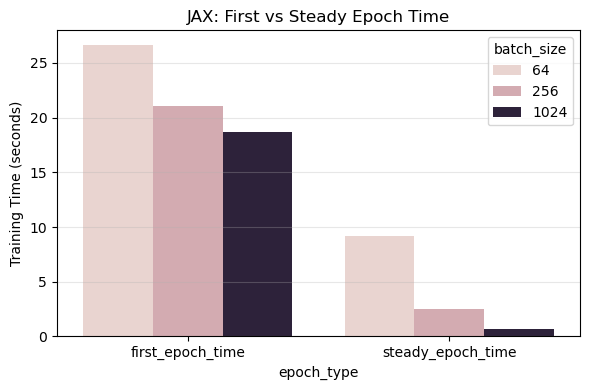

In [ ]:
df = pd.read_csv("results/summary.csv")

if "steady_epoch_time_s" not in df.columns and "steady_epoch_time" in df.columns:
    df = df.rename(columns={"steady_epoch_time": "steady_epoch_time_s"})


df_long = df.melt(
    id_vars=["batch_size"],
    value_vars=["first_epoch_time_s", "steady_epoch_time_s"],
    var_name="epoch_type",
    value_name="time_s"
)

# Clean labels
df_long["epoch_type"] = df_long["epoch_type"].map({
    "first_epoch_time_s": "first_epoch_time",
    "steady_epoch_time_s": "steady_epoch_time"
})

plt.figure(figsize=(6,4))
sns.barplot(
    data=df_long,
    x="epoch_type",
    y="time_s",
    hue="batch_size"
)

plt.ylabel("Training Time (seconds)")
plt.title("JAX: First vs Steady Epoch Time")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("viz/jax_first_vs_steady.png", dpi=200)
plt.show()

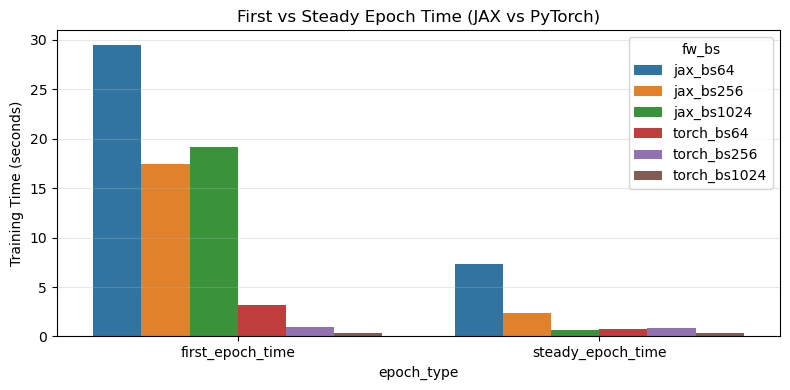

In [5]:
df = pd.read_csv("results/summary.csv")

# normalize column name
if "steady_epoch_time_s" not in df.columns and "steady_epoch_time" in df.columns:
    df = df.rename(columns={"steady_epoch_time": "steady_epoch_time_s"})

# wide -> long
df_long = df.melt(
    id_vars=["framework", "batch_size"],
    value_vars=["first_epoch_time_s", "steady_epoch_time_s"],
    var_name="epoch_type",
    value_name="time_s"
)

df_long["epoch_type"] = df_long["epoch_type"].map({
    "first_epoch_time_s": "first_epoch_time",
    "steady_epoch_time_s": "steady_epoch_time",
})

# combined hue key
df_long["fw_bs"] = df_long["framework"] + "_bs" + df_long["batch_size"].astype(str)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_long,
    x="epoch_type",
    y="time_s",
    hue="fw_bs"
)

plt.ylabel("Training Time (seconds)")
plt.title("First vs Steady Epoch Time (JAX vs PyTorch)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("viz/first_vs_steady_jax_vs_torch.png", dpi=200)
plt.show()


In [1]:
import os 
from src.support.reusable import LearningCurvesComparer

def main():
    out_dir = "viz/learning_curves"
    os.makedirs(out_dir, exist_ok=True)

    iter_csv_paths = {
        "jax": "metrics/Assignment1_JAX_dataset_metrics.csv",
        "torch": "metrics/Assignment1_torch_dataset_metrics.csv",
    }

    plotter = LearningCurvesComparer(iter_csv_paths)

    for fw in ["jax", "torch"]:
        for metric in ["Loss", "Accuracy"]:
            # iteration vs seed (all curves)
            plotter.plot_iteration_vs_col(framework=fw, metric=metric, ref_col="Seed", out_dir=out_dir)

            # iteration vs batch_size (mean±SD and mean±SE)
            plotter.plot_iteration_vs_col(framework=fw, metric=metric, ref_col="bs", out_dir=out_dir)

    print("Saved plots to:", out_dir)

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'jax'

NameError: name 'output_dir' is not defined

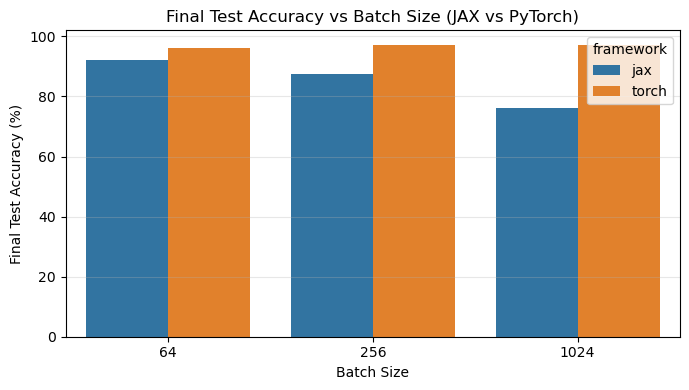

In [10]:
df["batch_size"] = df["batch_size"].astype(int)
df["final_test_acc"] = pd.to_numeric(df["final_test_acc"], errors="coerce")

# if accuracies stored as 0-1, convert to %
if df["final_test_acc"].max() <= 1.0:
    df["final_test_acc"] = 100.0 * df["final_test_acc"]

plt.figure(figsize=(7, 4))
sns.barplot(
data=df,
x="batch_size",
y="final_test_acc",
hue="framework"
)
plt.xlabel("Batch Size")
plt.ylabel("Final Test Accuracy (%)")
plt.title("Final Test Accuracy vs Batch Size (JAX vs PyTorch)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig(f"{output_dir}/final_test_acc_jax_vs_torch.png", dpi=200)
plt.show()